# Introduction to Rasterio

In [37]:
import rasterio 
import rasterio.plot
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

In [87]:
raster_path = ("https://github.com/opengeos/datasets/releases/download/raster/dem_90m.tif")
src = rasterio.open(raster_path)
print(src)

<open DatasetReader name='https://github.com/opengeos/datasets/releases/download/raster/dem_90m.tif' mode='r'>


In [88]:
src.name

'https://github.com/opengeos/datasets/releases/download/raster/dem_90m.tif'

In [89]:
src.mode

'r'

In [90]:
src.meta

{'driver': 'GTiff',
 'dtype': 'int16',
 'nodata': None,
 'width': 4269,
 'height': 3113,
 'count': 1,
 'crs': CRS.from_wkt('PROJCS["WGS 84 / Pseudo-Mercator",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Mercator_1SP"],PARAMETER["central_meridian",0],PARAMETER["scale_factor",1],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],EXTENSION["PROJ4","+proj=merc +a=6378137 +b=6378137 +lat_ts=0 +lon_0=0 +x_0=0 +y_0=0 +k=1 +units=m +nadgrids=@null +wktext +no_defs"],AUTHORITY["EPSG","3857"]]'),
 'transform': Affine(90.0, 0.0, -13442488.3428,
        0.0, -89.99579177642138, 4668371.5775)}

In [91]:
src.crs

CRS.from_wkt('PROJCS["WGS 84 / Pseudo-Mercator",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Mercator_1SP"],PARAMETER["central_meridian",0],PARAMETER["scale_factor",1],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],EXTENSION["PROJ4","+proj=merc +a=6378137 +b=6378137 +lat_ts=0 +lon_0=0 +x_0=0 +y_0=0 +k=1 +units=m +nadgrids=@null +wktext +no_defs"],AUTHORITY["EPSG","3857"]]')

In [92]:
src.res

(90.0, 89.99579177642138)

In [94]:
src.width

4269

In [95]:
src.height

3113

In [96]:
src.bounds

BoundingBox(left=-13442488.3428, bottom=4388214.6777, right=-13058278.3428, top=4668371.5775)

In [97]:
src.transform

Affine(90.0, 0.0, -13442488.3428,
       0.0, -89.99579177642138, 4668371.5775)

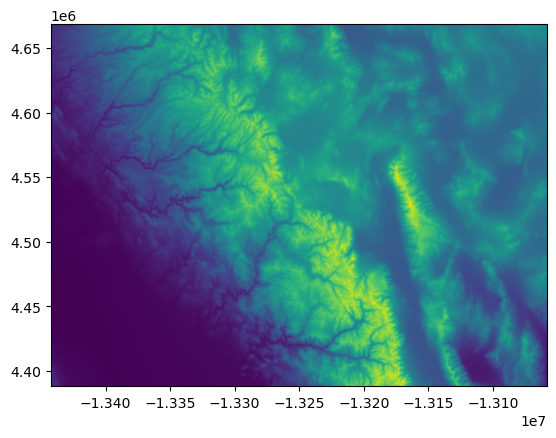

<Axes: >

In [98]:
rasterio.plot.show(src)

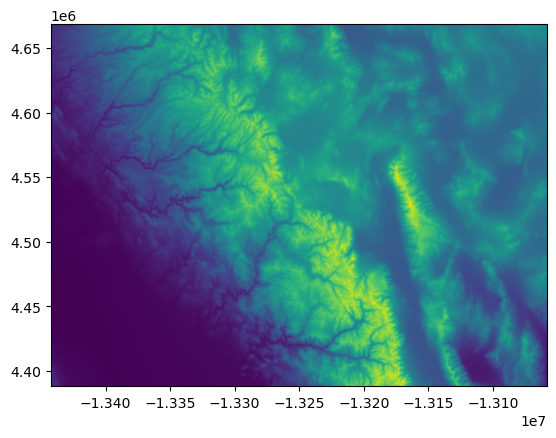

<Axes: >

In [100]:
# plotting a specific band like 5 in this
rasterio.plot.show(src,5)

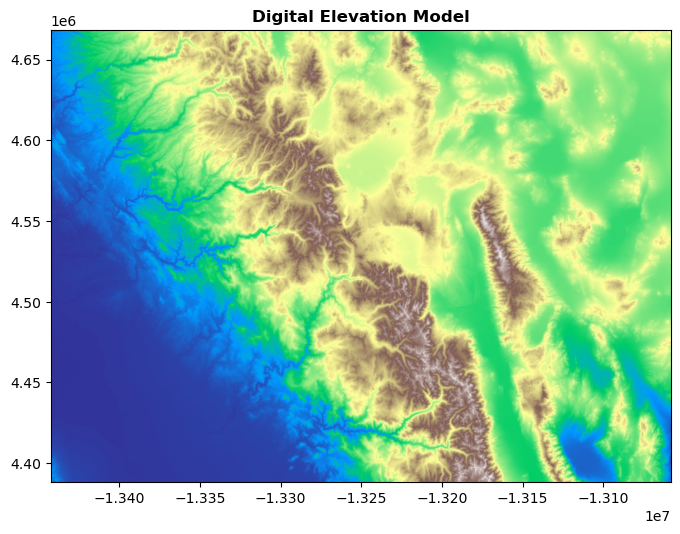

In [101]:
fig,ax = plt.subplots(figsize=(8,8))
rasterio.plot.show(src,cmap='terrain',ax=ax,title="Digital Elevation Model")
plt.show()

In [102]:
dem_bounds = ("https://github.com/opengeos/datasets/releases/download/places/dem_bounds.geojson")
gdf=gpd.read_file(dem_bounds)
gdf = gdf.to_crs(src.crs)

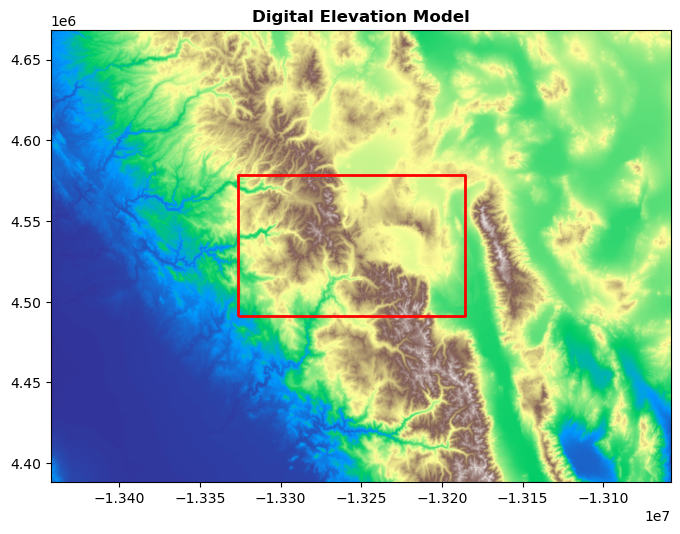

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))
rasterio.plot.show(src, cmap='terrain', ax=ax, title='Digital Elevation Model')
gdf.plot(ax=ax,edgecolor='red',facecolor='none', linewidth=2)
#gdf.boundary.plot(ax=ax, edgecolor='red', linewidth=2) // this also works fine
plt.show()


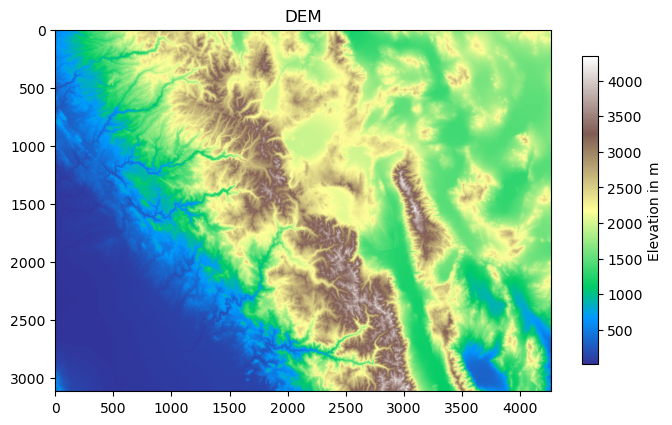

In [106]:
elev_band = src.read(1)
plt.figure(figsize=(8,8))
plt.imshow(elev_band,cmap= 'terrain')
plt.colorbar(label="Elevation in m", shrink = 0.5)
plt.title("DEM")
plt.show()

# Accessing and Manipulation Raster Bands

In [107]:
raster_path = 'https://github.com/opengeos/datasets/releases/download/raster/LC09_039035_20240708_90m.tif'
src=rasterio.open(raster_path)
print(src)

<open DatasetReader name='https://github.com/opengeos/datasets/releases/download/raster/LC09_039035_20240708_90m.tif' mode='r'>


In [108]:
src.meta

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': -inf,
 'width': 2485,
 'height': 2563,
 'count': 7,
 'crs': CRS.from_wkt('PROJCS["WGS 84 / UTM zone 11N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-117],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32611"]]'),
 'transform': Affine(90.0, 0.0, 582390.0,
        0.0, -90.0, 4105620.0)}

In [109]:
rasterio.plot.show(src,5,cmap = 'Greys_r')

<Axes: >

In [110]:
src.count

7

In [111]:
band_names = ["Coastal Aerosol", "Blue", "Green", "Red", "NIR", "SWIR1", "SWIR2"]

[<Axes: > <Axes: > <Axes: > <Axes: > <Axes: > <Axes: >]


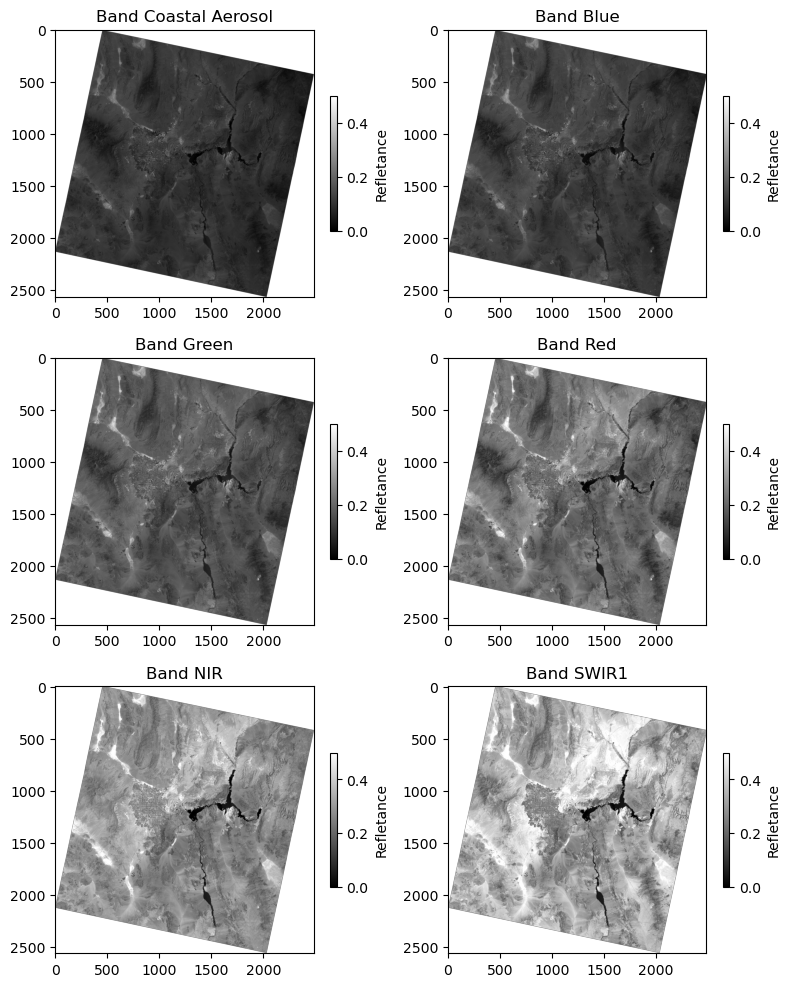

In [112]:
fig,axes = plt.subplots(nrows=3,ncols=2, figsize = (8,10))
axes=axes.flatten()
print(axes)
for band in range (1,src.count):
    data=src.read(band)
    ax = axes[band-1]
    im=ax.imshow(data,cmap='grey',vmin=0, vmax=0.5)
    ax.set_title(f"Band {band_names[band-1]}")
    fig.colorbar(im, ax=ax, label = 'Refletance', shrink = 0.5)
plt.tight_layout()
plt.show()
    


# Stacking the Bands.

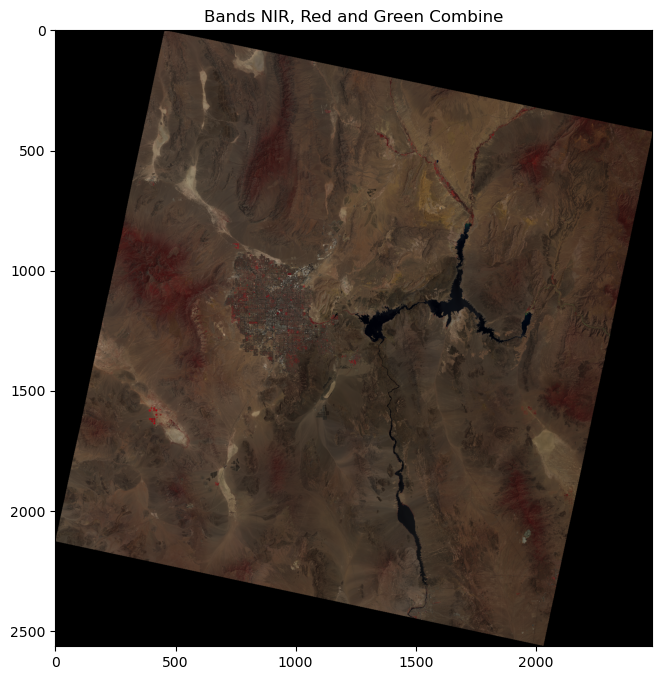

In [113]:
nir_band = src.read(5)
red_band = src.read(4)
green_band = src.read(3)
# Stack the band into singel array.
nirgb=np.dstack((nir_band,red_band,green_band)).clip(0,1)
plt.figure(figsize = (8,8))
plt.imshow(nirgb)
plt.title ('Bands NIR, Red and Green Combine')
plt.show()

# NDVI is calculated as:

NDVI = (NIR - Red) / (NIR + Red)

C:\Users\USER\AppData\Local\Temp\ipykernel_5804\3320855200.py:1: RuntimeWarning: invalid value encountered in subtract
  nvdi  = (nir_band - red_band) / (nir_band + red_band)


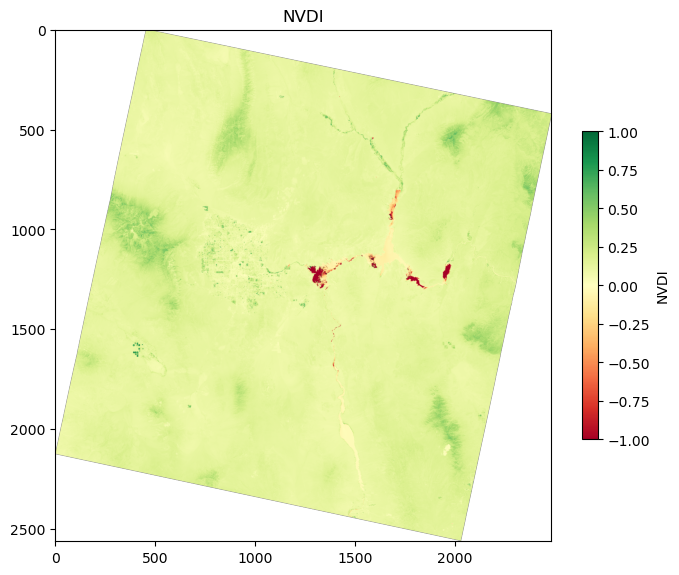

In [114]:
nvdi  = (nir_band - red_band) / (nir_band + red_band) 
nvdi =  nvdi.clip(-1,1)
plt.figure(figsize=(8,8))
plt.imshow(nvdi, cmap='RdYlGn',vmin=-1, vmax=1)
plt.title ("NVDI")
plt.colorbar(label='NVDI', shrink = 0.5)
plt.show()

# Writing Raster Data

In [62]:
with rasterio.open(raster_path) as src:
    profile = src.profile
print(profile)

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -inf, 'width': 2485, 'height': 2563, 'count': 7, 'crs': CRS.from_wkt('PROJCS["WGS 84 / UTM zone 11N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-117],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32611"]]'), 'transform': Affine(90.0, 0.0, 582390.0,
       0.0, -90.0, 4105620.0), 'blockxsize': 512, 'blockysize': 512, 'tiled': True, 'compress': 'deflate', 'interleave': 'pixel'}


In [115]:
profile.update(dtype=rasterio.float32,count=1,compress = "lzw")
print(profile)

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -inf, 'width': 2485, 'height': 2563, 'count': 1, 'crs': CRS.from_wkt('PROJCS["WGS 84 / UTM zone 11N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-117],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32611"]]'), 'transform': Affine(90.0, 0.0, 582390.0,
       0.0, -90.0, 4105620.0), 'blockxsize': 512, 'blockysize': 512, 'tiled': True, 'compress': 'lzw', 'interleave': 'pixel'}


In [64]:
#Finally writing the NVDI data to new file
output_raster_path = 'nvdi.tif'

with rasterio.open(output_raster_path,'w',**profile) as dst:
    dst.write(nvdi,1)
print(f"Raster Data has been written to {output_raster_path}")

Raster Data has been written to nvdi.tif


# Clipping Raster Data
# Array Slicing

In [119]:
src = rasterio.open(raster_path)
data = src.read()

In [116]:
data.shape

(2563, 2485)

In [123]:
subset = data [:,900:1400, 700:1200].clip(0,1)
print(f"Shape of Original File: {subset.shape}")
rgb_subset=np.dstack((subset[4],subset[3],subset[2]))
rgb_subset.shape

Shape of Original File: (7, 500, 500)


(500, 500, 3)

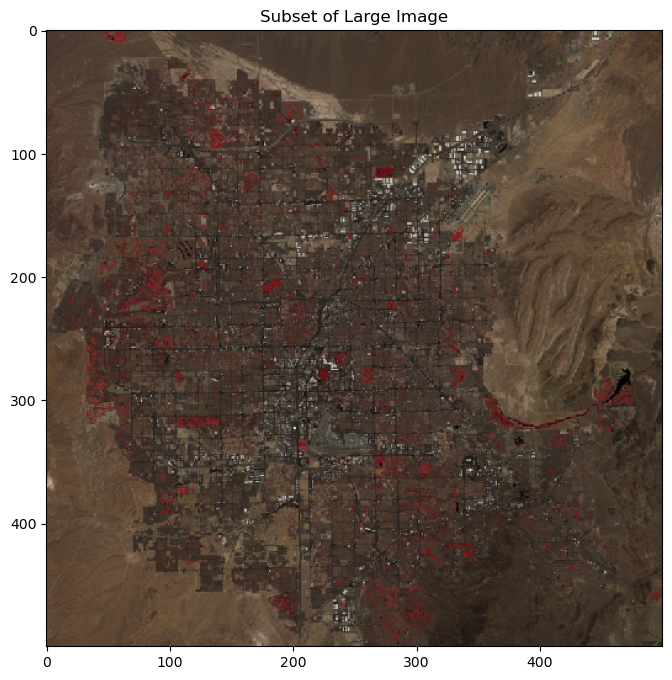

In [68]:
plt.figure(figsize=(8,8))
plt.imshow(rgb_subset)
plt.title("Subset of Large Image")
plt.show()

# Clipping Using Geographic window

In [124]:
from rasterio.windows import Window
from rasterio.transform import from_bounds


In [125]:
#using the src which is already set as in the above example

from rasterio.windows import Window
from rasterio.transform import from_bounds

# Define the window of the subset (replace with actual window coordinates)
window = Window(col_off=700, row_off=900, width=500, height=500)

# Calculate the bounds of the window
window_bounds = rasterio.windows.bounds(window, src.transform)

# Calculate the new transform based on the window bounds
new_transform = from_bounds(*window_bounds, window.width, window.height)

In [71]:
# After defining the windows we write the clipped data to a new file
with rasterio.open(
    "las_vegas.tif",
    "w",
    driver="GTiff",
    height=window.height,
    width=window.width,
    count=subset.shape[0],
    dtype=subset.dtype,
    crs=src.crs,
    transform=new_transform,
    compress="lzw",
) as dst:
    dst.write(subset)

# Clipping with Vector Data

In [126]:
import fiona
import rasterio.mask

In [127]:
geojson_path = "https://github.com/opengeos/datasets/releases/download/places/las_vegas_bounds_utm.geojson"
bounds = gpd.read_file(geojson_path)
bounds.head()

geometry
0  POLYGON ((645428.627 3978864.593, 644662.653 4...

<Axes: >

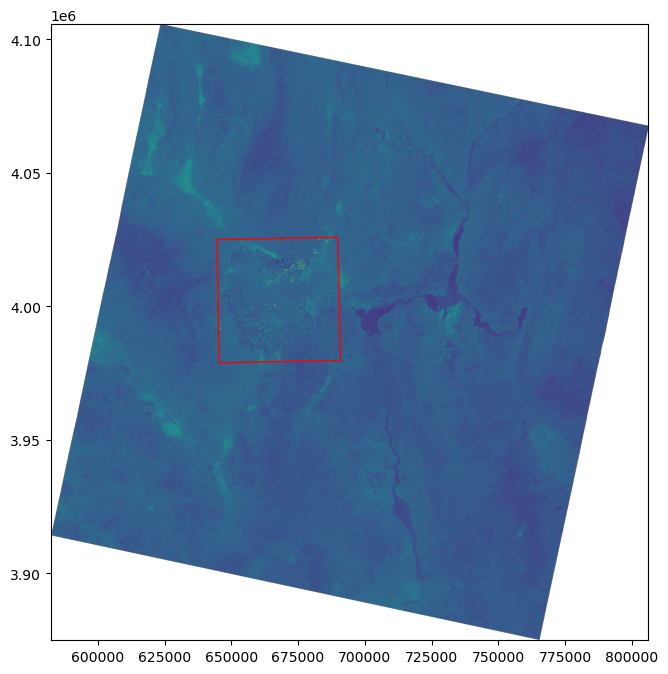

In [129]:
fig,ax = plt.subplots(figsize = (8,8))
rasterio.plot.show(src,ax=ax)
bounds.plot(ax=ax,edgecolor='red',facecolor='None')


In [130]:
with fiona.open(geojson_path,'r') as f:
    shapes=[feature['geometry'] for feature in f]

shapes

[fiona.Geometry(coordinates=[[(645428.6271480253, 3978864.5931219356), ...]], type='Polygon')]

In [132]:
out_image,out_transform=rasterio.mask.mask(src,shapes, crop=True)

In [135]:
src.meta

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': -inf,
 'width': 2485,
 'height': 2563,
 'count': 7,
 'crs': CRS.from_wkt('PROJCS["WGS 84 / UTM zone 11N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-117],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32611"]]'),
 'transform': Affine(90.0, 0.0, 582390.0,
        0.0, -90.0, 4105620.0)}

In [134]:
out_meta = src.meta
out_meta.update (
    {
        'driver' : 'GTiff',
        'height' :out_image.shape[1],
        'width' : out_image.shape[2],
        'transform' : out_transform,
    }
)
with rasterio.open('las_vegas_clip.tif','w',**out_meta) as dst:
    dst.write(out_image)

In [ ]:
# writing the rgb_subset as three band to file
rgb_subset.shape

(500, 500, 3)

In [140]:
# First updte the profiel
profile = src.profile.copy()
print(f"Original Profile: {profile}")
profile.update(
    {
        'count' :  3
    }
)
print(f"Updated Profile: {profile}")


Original Profile: {'driver': 'GTiff', 'dtype': 'float32', 'nodata': -inf, 'width': 2485, 'height': 2563, 'count': 7, 'crs': CRS.from_wkt('PROJCS["WGS 84 / UTM zone 11N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-117],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32611"]]'), 'transform': Affine(90.0, 0.0, 582390.0,
       0.0, -90.0, 4105620.0), 'blockxsize': 512, 'blockysize': 512, 'tiled': True, 'compress': 'deflate', 'interleave': 'pixel'}
Updated Profile: {'driver': 'GTiff', 'dtype': 'float32', 'nodata': -inf, 'width': 2485, 

In [142]:
# Now we are ready to write it to file have three bands.

with rasterio.open("Small_Las_Vegas.tif",'w', **profile) as dst:
    for i in range(1,4):
        dst.write(rgb_subset[:,:,i-1],i)
    print("Small Las Vegas Written to File")

Small Las Vegas Written to File
